<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/YF%20RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf_agents[reverb]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 9.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 5.6 MB/s eta 0:00:0

In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 9.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.1/113.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.6 MB/s eta 0:00:00
  Created wheel fo

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view
import tracemalloc

import tensorflow_probability as tfp

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Concatenate, GaussianNoise
from tensorflow.keras.regularizers import l2

from tf_agents.networks import network
from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.environments import py_environment, tf_py_environment, utils
from tf_agents.specs import array_spec, tensor_spec
from tf_agents.trajectories import trajectory, time_step as ts
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer
from tf_agents.policies.random_tf_policy import RandomTFPolicy
from tf_agents.policies.boltzmann_policy import BoltzmannPolicy
from tf_agents.policies import tf_policy
from tf_agents.utils import common

2023-10-20 02:05:10.530443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
BATCH_SIZE = 64 # @param {type:"integer"}
EVAL_EPISODES = 3 # @param {type:"integer"}
NUMBER_EPISODES = 10000000000 # @param {type:"integer"}
COLLECTION_STEPS = 1 # @param {type:"integer"}
EVAL_INTERVAL =  500 # @param {type:"integer"}

### <font color='purple'><center>**-------------------Create Data-------------------**</font>

In [4]:
end_date = datetime.now()
start_date = end_date - timedelta(days=729)

tickers = [
    'EURUSD=X', 'USDEUR=X',  # Euro/US Dollar
    'USDJPY=X', 'JPYUSD=X',  # US Dollar/Japanese Yen
    'GBPUSD=X', 'USDGBP=X',  # British Pound/US Dollar
    'USDCHF=X', 'CHFUSD=X',  # US Dollar/Swiss Franc
    'AUDUSD=X', 'USDAUD=X',  # Australian Dollar/US Dollar
    'USDCAD=X', 'CADUSD=X',  # US Dollar/Canadian Dollar
    'NZDUSD=X', 'USDNZD=X',  # New Zealand Dollar/US Dollar
]

data_list = []
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval='1h')
    data_list.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
def create_data(raw_data, window_size):
    High = raw_data['High'].to_numpy()
    Close = raw_data['Close'].to_numpy()
    Low = raw_data['Low'].to_numpy()
    Std = np.std(np.diff(Close))
    Close_Diff = np.diff(Close)/Std
    High_Adj = (High[1:]-Close[1:])/Std
    Low_Adj = (Close[1:]-Low[1:])/Std 
    
    stack = np.stack((Close_Diff, High_Adj, Low_Adj), axis=1)
    
    window_view = np.lib.stride_tricks.sliding_window_view(stack, (window_size,),axis=0)
    
    Forex_Data = window_view[:-1]
    Forex_Data = Forex_Data.astype('float32')
    target = Close_Diff[window_size:]
    
    return Forex_Data, target
       

In [6]:
window_list = []
target_list = []
for data in data_list:
    window, target =  create_data(data, 50)
    window_list.append(window)
    target_list.append(target)
    

### <font color='red'><center>**-------------------Create Environment-------------------**</font>

In [330]:
def custom_formatter(x):
  return f'{x:.4f}'

def test_environment(env, num_steps):
    # Reset the environment
    observation = env.reset()

    # Get the upper bound of the action range
    action_spec = env.action_spec().maximum

    # Loop through the time steps and take random actions
    for _ in range(num_steps):
        # Select a random action from the range of valid values
        action = np.random.randint(0, action_spec)

        # Execute the action and get the next observation, reward, done, and info
        observation, reward, done, info = env.step(action)

        # Print the current time step
        np.set_printoptions(formatter={'float_kind':custom_formatter})
        print(action,"{:.4f}".format(reward),info[1])

In [369]:
def SortinoRatio(df, T):
    """Calculates the Sortino ratio from univariate excess returns.

    Args:
        df ([float]): The dataframe or pandas series of univariate excess returns.
        T ([integer]): The targeted return. 
    """

    # Check if there are less than two numbers in the array or no downside returns
    if len(df) < 2:
        return -1
    if np.all(df >= T):
        return 0

    #downside deviation:
    temp = np.minimum(0, df - T)**2
    temp_expectation = np.mean(temp)
    downside_dev = np.sqrt(temp_expectation)

    #Sortino ratio:
    sortino_ratio = np.mean(df - T) / downside_dev

    return(sortino_ratio)

In [414]:
start = 1
epi_length = 100
class TradingEnv(py_environment.PyEnvironment):

  def __init__(self):
    global start
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), dtype=np.int64, minimum=0, maximum=3, name='action')

    self._observation_spec = (
        array_spec.BoundedArraySpec(shape=(3,50), dtype=np.float32, name='observation1'),
        array_spec.BoundedArraySpec(shape=(2,), dtype=np.float32, name='observation2')
    )

    self._count = np.random.randint(1,10000)#startstart
    self._ticker = np.random.randint(0,len(window_list))
    
    self._max_ep_len = self._count + epi_length
    self._scaler = np.sum(np.absolute(target_list[self._ticker][self._count:self._max_ep_len]))
    self._state = (window_list[self._ticker][self._count-1], np.array([0, 0], dtype=np.float32))
    self._episode_ended = False

    self._trade_info = {'value': 0,'direction': 0}
    self._balance = np.array([])
    self._new = False


  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec

  def get_balance(self):
    return self._balance

  def _reset(self):
    global start
    self._count = np.random.randint(1,10000)#start
    self._ticker = np.random.randint(0,len(window_list))
    self._max_ep_len = self._count + epi_length
    self._scaler = np.sum(np.absolute(target_list[self._ticker][self._count:self._max_ep_len]))
    self._state = (window_list[self._ticker][self._count-1], np.array([0, 0], dtype=np.float32))
    self._episode_ended = False
    self._trade_info = {'value': 0,'direction': 0}
    self._balance = np.array([])
    self._new = False


    return ts.restart(self._state)

  def _step(self, action):
    global start

    if self._episode_ended:
      return self.reset()

    profit = 0
    reward = 0
    fee = 0
    cur_target = target_list[self._ticker][self._count]
    
    
    if action == 0:
        profit = self._trade_info['value']
        self._trade_info['value'] = cur_target
        self._trade_info['direction'] = 1
    elif action == 1:
        profit = self._trade_info['value']
        self._trade_info['value'] = -cur_target
        self._trade_info['direction'] = -1
    elif action == 2:
        self._trade_info['value'] += cur_target*self._trade_info['direction']
    else:
        profit = self._trade_info['value']
        self._trade_info['value'] = 0
        self._trade_info['direction'] = 0
        
        
    reward = (profit/self._scaler)
        
 
        
    trade_array = np.array([self._trade_info['value'],self._trade_info['direction']], dtype=np.float32)


    self._state = (window_list[self._ticker][self._count], trade_array)
    
    if profit != 0:
        self._balance = np.append(profit,self._balance)



    if self._count >= self._max_ep_len:
        if self._trade_info['value'] < 0:
            self._balance = np.append(profit,self._balance)
        self._episode_ended = True

    self._count += 1

    if self._episode_ended:
      reward = SortinoRatio(self._balance,0)
      return ts.termination(self._state, reward=reward)
    else:
      return ts.transition(self._state, reward=reward, discount=.99)



env = TradingEnv()
utils.validate_py_environment(env, episodes=2)

print('Observation Spec:')
print(env.time_step_spec().observation)

print('Reward Spec:')
print(env.time_step_spec().reward)

print('Action Spec:')
print(env.action_spec())

train_env = tf_py_environment.TFPyEnvironment(env)
evaluation_env = tf_py_environment.TFPyEnvironment(env)

Observation Spec:
(BoundedArraySpec(shape=(3, 50), dtype=dtype('float32'), name='observation1', minimum=-3.4028234663852886e+38, maximum=3.4028234663852886e+38), BoundedArraySpec(shape=(2,), dtype=dtype('float32'), name='observation2', minimum=-3.4028234663852886e+38, maximum=3.4028234663852886e+38))
Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')
Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)


In [415]:
test_environment(env,100)

0 0.0000 [0.7592 1.0000]
2 0.0000 [0.6197 1.0000]
0 0.0082 [-2.2577 1.0000]
1 -0.0297 [-1.8220 -1.0000]
1 -0.0240 [-1.3902 -1.0000]
2 0.0000 [-3.3347 -1.0000]
2 0.0000 [-2.5601 -1.0000]
0 -0.0337 [1.2376 1.0000]
1 0.0163 [0.5809 -1.0000]
2 0.0000 [1.7350 -1.0000]
1 0.0228 [-0.0000 -1.0000]
2 0.0000 [1.3481 -1.0000]
2 0.0000 [3.0980 -1.0000]
2 0.0000 [2.8294 -1.0000]
1 0.0372 [-0.4123 -1.0000]
1 -0.0054 [-0.2827 -1.0000]
2 0.0000 [0.2062 -1.0000]
2 0.0000 [-0.1973 -1.0000]
0 -0.0026 [-0.7305 1.0000]
1 -0.0096 [0.0761 -1.0000]
2 0.0000 [1.0861 -1.0000]
2 0.0000 [1.2646 -1.0000]
2 0.0000 [-0.6453 -1.0000]
2 0.0000 [-0.2239 -1.0000]
1 -0.0029 [0.5998 -1.0000]
0 0.0079 [0.6760 1.0000]
1 0.0089 [0.4523 -1.0000]
1 0.0060 [0.0447 -1.0000]
1 0.0006 [0.1476 -1.0000]
2 0.0000 [0.5410 -1.0000]
0 0.0071 [-1.3417 1.0000]
0 -0.0177 [-0.0756 1.0000]
2 0.0000 [1.5383 1.0000]
0 0.0202 [-2.3070 1.0000]
2 0.0000 [-3.6179 1.0000]
1 -0.0476 [-0.1017 -1.0000]
1 -0.0013 [-0.7214 -1.0000]
1 -0.0095 [-0.4301 -1

### <font color='blue'><center>**-------------------Create Network-------------------**</font>

In [416]:
class CustomQNetwork(network.Network):
    def __init__(self, input_tensor_spec, action_spec, name='CustomQNetwork'):
        super(CustomQNetwork, self).__init__(input_tensor_spec=input_tensor_spec,
                                             state_spec=(),
                                             name=name)
        # Define your custom layers and architecture here
        self.LSTM1 = LSTM(units=200, activation='gelu', return_sequences=True)
        self.LSTM2 = LSTM(units=200, activation='gelu', return_sequences=False)
        self.BatchNorm1 = BatchNormalization()
        self.Concat = Concatenate()
        self.Dense1 = Dense(200,activation='gelu')
        self.BatchNorm2 = BatchNormalization()
        self.Dense2 = Dense(200,activation='gelu')
        self.BatchNorm3 = BatchNormalization()
        self.q_values_layer = Dense(action_spec.maximum - action_spec.minimum + 1,
                                                    activation=None)
        self.gaussian_noise_layer = GaussianNoise(stddev=.4)  # Add Gaussian noise with stddev=0.2

    def call(self, observation, step_type=None, network_state=(), training=False):
        # Split the observation into two arrays
        observation1, observation2 = observation

        if training:
            observation1 = self.gaussian_noise_layer(observation1)

        x = self.LSTM1(observation1)
        x = self.LSTM2(x)
        x = self.BatchNorm1(x)
        x = self.Concat([x,observation2])
        x = self.Dense1(x)
        x = self.BatchNorm2(x)
        x = self.Dense2(x)
        x = self.BatchNorm3(x)
        q_values = self.q_values_layer(x)
        return q_values, network_state

In [417]:
class CategoricalQNetwork(network.Network):
    def __init__(self, input_tensor_spec, action_spec, num_atoms=51, preprocessing_layers=None,
                 preprocessing_combiner=None, conv_layer_params=None, fc_layer_params=None,
                 activation_fn=tf.nn.relu, name='CategoricalQNetwork'):
        super(CategoricalQNetwork, self).__init__(input_tensor_spec=input_tensor_spec,
                                                  state_spec=(),
                                                  name=name)
        # Check if action_spec is a BoundedTensorSpec
        if not isinstance(action_spec, tensor_spec.BoundedTensorSpec):
            raise TypeError('action_spec must be a BoundedTensorSpec. Got: %s' % (action_spec,))

        self._num_actions = action_spec.maximum - action_spec.minimum + 1
        self._num_atoms = num_atoms

        # Create a BoundedTensorSpec for the q_network action
        q_network_action_spec = tensor_spec.BoundedTensorSpec((), tf.int32,
                                                              minimum=0,
                                                              maximum=self._num_actions * num_atoms - 1)

        # Create the q_network
        self._q_network = CustomQNetwork(input_tensor_spec=input_tensor_spec,
                                             action_spec=q_network_action_spec,
                                             )
    def call(self, observation, step_type=None, network_state=(), training=False):
        logits, network_state = self._q_network(observation, step_type, network_state, training=training)
        logits = tf.reshape(logits, [-1, self._num_actions, self._num_atoms])
        return logits, network_state
    @property
    def num_atoms(self):
        return self._num_atoms

In [418]:
observation_spec = train_env.observation_spec()
action_spec = train_env.action_spec()
num_atoms = 51
custom_network = CategoricalQNetwork(observation_spec,action_spec, num_atoms)

In [419]:
EPSILON_INIT = .5
EPSILON_MIN = 0.1
EPSILON_DECAY_STEPS = 2e5


# Define the epsilon decay function
def epsilon_decay(global_step):
    epsilon = EPSILON_INIT - (EPSILON_INIT - EPSILON_MIN) * tf.minimum(1.0, tf.cast(global_step, tf.float32) / EPSILON_DECAY_STEPS)
    return epsilon
train_env

In [420]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=.01)
global_step = tf.Variable(0, name='global_step', trainable=False)
train_step_counter = tf.Variable(0)

C51_agent = categorical_dqn_agent.CategoricalDqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    categorical_q_network=custom_network,
    optimizer=optimizer,
    min_q_value=-4,
    max_q_value=4,
    epsilon_greedy=None,
    n_step_update=2,
    boltzmann_temperature=.8,
    td_errors_loss_fn=common.element_wise_squared_loss,
    gamma=1,
    train_step_counter=train_step_counter)
C51_agent.initialize()

### <font color='green'><center>**-------------------Create Replay Buffer And Training Loop-------------------**</font>

In [421]:
def timestamp_data(environment, policy, replay_buffer):
        time_step = environment.current_time_step()
        action_step = policy.action(time_step)
        next_time_step = environment.step(action_step.action)
        timestamp_trajectory = trajectory.from_transition(time_step, action_step, next_time_step)
        replay_buffer.add_batch(timestamp_trajectory)

In [423]:
replay_buffer.clear()
#define replay buffer
replay_buffer = TFUniformReplayBuffer(
            data_spec=C51_agent.collect_data_spec,
            batch_size=train_env.batch_size,
            max_length=50000)

#random policy for filling buffer
random_policy = RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

train_env.reset()
#fill replay buffer
for _ in range(1000):
    timestamp_data(train_env, random_policy,replay_buffer)
   
#create dataset from buffer
dataset = replay_buffer.as_dataset(
            num_parallel_calls=tf.data.AUTOTUNE,
            sample_batch_size=BATCH_SIZE,
            num_steps=2).prefetch(tf.data.AUTOTUNE)

iterator = iter(dataset)


In [424]:
#define checkpointer
checkpoint_dir = '/tmp/MODEL2'

train_checkpointer = common.Checkpointer(
        ckpt_dir=checkpoint_dir,
        max_to_keep=1,
        agent=C51_agent,
        policy=C51_agent.policy,
        replay_buffer=replay_buffer,
        global_step=global_step
    )


In [425]:
train_checkpointer.initialize_or_restore(checkpoint_dir)

In [426]:
from tf_agents.trajectories import policy_step
class CustomPolicy(tf_policy.TFPolicy):
    def __init__(self, time_step_spec, action_spec,network,agent, name=None):
        super(CustomPolicy, self).__init__(
            time_step_spec,
            action_spec,
            policy_state_spec=(),
            clip=False,
            name=name)
        self._network = network
        self._agent = agent
        self._epsilon = epsilon_decay(global_step)

    def _action(self, time_step, policy_state=(), seed=None):
        # Define your action logic here
               
        
        if tf.random.uniform([], minval=0, maxval=1, dtype=tf.float32) < self._epsilon:
            Distribution = self._network(time_step.observation)[0][0]   
            tensors = []
    
            highest_index = Entropy(Distribution)
            action = tf.cast(highest_index,tf.int64)
            action = tf.reshape(action,(1,))
        else:
            action = self._agent.policy.action(time_step)[0]
        return policy_step.PolicyStep(action, state=policy_state, info=())

    def _get_initial_state(self, batch_size=None):
        # Define your initial state logic here
        return ()

0
3.787323


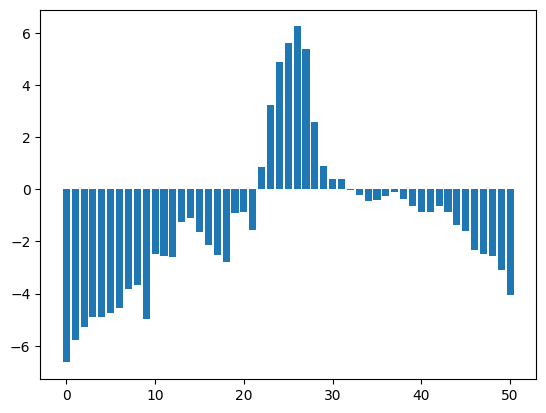

1
3.782768


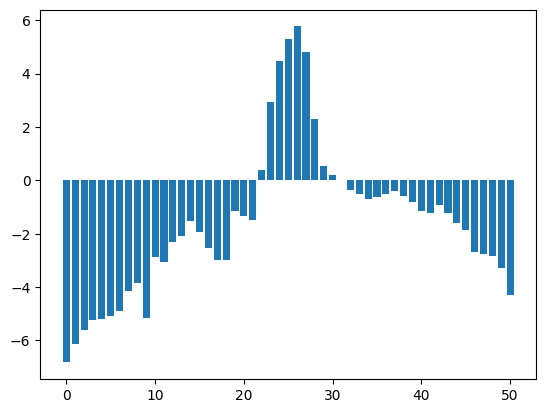

2
3.7834346


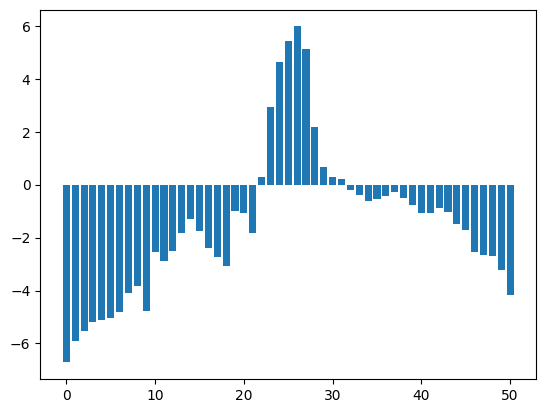

3
3.7690644


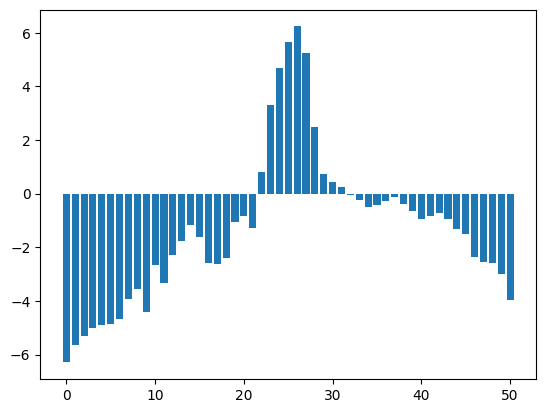

0
-inf


In [441]:
from scipy.stats import entropy
import scipy
# Get the distribution
time_step = train_env.current_time_step()
action_step = C51_agent.policy.action(time_step)
next_time_step = train_env.step(action_step.action)
state = time_step.observation
distributions = custom_network(state)[0][0]
testttt = tf.cast(distributions,tf.float32)
#softmax_distribution = tf.nn.softmax(testttt)
#entropy = -tf.reduce_sum(softmax_distribution * tf.math.log(softmax_distribution))

#the_val = testttt.numpy()
#val = scipy.stats.entropy(the_val)





def entropy_single(distribution):
    epsilon = 1e-10
    min_value = tf.reduce_min(distribution)
    tensor_subtracted = tf.subtract(distribution, min_value)
    offset = tf.add(tensor_subtracted,epsilon) 
    sum_tensor = tf.reduce_sum(offset)
    p = tf.divide(offset, sum_tensor)
    return -tf.reduce_sum(p * tf.math.log(p))


def Entropy(Distribution):
    entropy_values = tf.map_fn(entropy_single, Distribution)
    highest_index = tf.math.argmax(entropy_values)
    return highest_index

for i in range(4):
    print(i)
    print(entropy_single(testttt[i]).numpy())
    plt.bar(range(len(testttt[i])), testttt[i])
    plt.show()
print(Entropy(distributions).numpy())
print(val)



In [428]:
time_step_spec = train_env.time_step_spec()
action_spec = train_env.action_spec()
print(action_spec)

BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(3))


In [429]:
my_policy = CustomPolicy(time_step_spec,action_spec,custom_network,C51_agent)

In [430]:
time_step = train_env.current_time_step()
action_step = my_policy.action(time_step)

print(action_step)

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, state=(), info=())


In [431]:
def run_environment(env,policy):
    time_step = env.reset()

    while not time_step.is_last():
        action = policy.action(time_step)
        next_time_step = env.step(action)
        reward = next_time_step.reward
        time_step = next_time_step

    return reward

In [ ]:
@tf.function
def train(agent):
    

    for step in tf.range(1000):
        for _ in tf.range(COLLECTION_STEPS):
        #while not time_step.is_last():
            timestamp_data(train_env, agent.collect_policy, replay_buffer)

        experience, info = next(iterator)
        train_loss = agent.train(experience).loss

        if step % EVAL_INTERVAL == 0:
            avg_reward = run_environment(evaluation_env,agent.policy)
            
            tf.print('Reward:',avg_reward[0],' Loss:',train_loss,' Epsilon:',epsilon_decay(global_step))


        #Increment the global step variable
        global_step.assign_add(1)


print("**********************************")
print("Training C51_agent")
print("**********************************")
for i in range(1000000000):
    C51_reward = train(C51_agent)
    train_checkpointer.save(global_step)

**********************************
Training C51_agent
**********************************
Reward: 0.218040496  Loss: 1.53142858  Epsilon: 0.486
Reward: 0.0623401776  Loss: 1.84015167  Epsilon: 0.485
Reward: 0.219641358  Loss: 1.00063884  Epsilon: 0.484
Reward: -0.252699256  Loss: 2.94196033  Epsilon: 0.483
Reward: 0.452373385  Loss: 2.12834716  Epsilon: 0.482
Reward: -1  Loss: 2.04778671  Epsilon: 0.481
Reward: -0.630237222  Loss: 1.12560773  Epsilon: 0.48
Reward: 0.257305622  Loss: 0.637182176  Epsilon: 0.479
Reward: -0.123332024  Loss: 1.43012023  Epsilon: 0.478
Reward: -1  Loss: 3.06760073  Epsilon: 0.477
Reward: -0.475237727  Loss: 1.83021665  Epsilon: 0.476
Reward: -1  Loss: 1.82645607  Epsilon: 0.475
Reward: -0.201616168  Loss: 1.44824433  Epsilon: 0.474
Reward: 0.759490192  Loss: 2.26330662  Epsilon: 0.473
Reward: 0.176342636  Loss: 1.9381187  Epsilon: 0.472
Reward: -1  Loss: 1.18396592  Epsilon: 0.471000016
Reward: -0.145400628  Loss: 1.51457095  Epsilon: 0.47
Reward: 0.03324795

In [ ]:
print(global_step)

In [438]:
def compute_avg_return_print(environment, policy, num_episodes=10):

  total_return = 0.0
  for episode in range(num_episodes):
    balance_arr = []
    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      obs = time_step.observation

      balance = np.sum(env.get_balance())
      balance_arr.append(balance)
      # Print the episode number and observation at each step
      print(f"Episode {episode + 1}: Observation = {obs[1]}")

      episode_return += time_step.reward
    plt.plot(balance_arr)
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]

Episode 1: Observation = [[-0.5940 1.0000]]
Episode 1: Observation = [[0.6336 1.0000]]
Episode 1: Observation = [[0.0396 1.0000]]
Episode 1: Observation = [[0.3960 1.0000]]
Episode 1: Observation = [[0.1584 1.0000]]
Episode 1: Observation = [[0.6336 1.0000]]
Episode 1: Observation = [[0.1584 1.0000]]
Episode 1: Observation = [[-0.6336 1.0000]]
Episode 1: Observation = [[0.0792 1.0000]]
Episode 1: Observation = [[-0.1584 1.0000]]
Episode 1: Observation = [[-0.1980 1.0000]]
Episode 1: Observation = [[0.0000 1.0000]]
Episode 1: Observation = [[-0.8316 1.0000]]
Episode 1: Observation = [[0.3960 1.0000]]
Episode 1: Observation = [[0.8712 1.0000]]
Episode 1: Observation = [[-0.6732 1.0000]]
Episode 1: Observation = [[0.3960 1.0000]]
Episode 1: Observation = [[-0.6732 1.0000]]
Episode 1: Observation = [[-0.3960 1.0000]]
Episode 1: Observation = [[0.4752 1.0000]]
Episode 1: Observation = [[-0.1980 1.0000]]
Episode 1: Observation = [[-1.2672 1.0000]]
Episode 1: Observation = [[-1.0295 1.0000]]


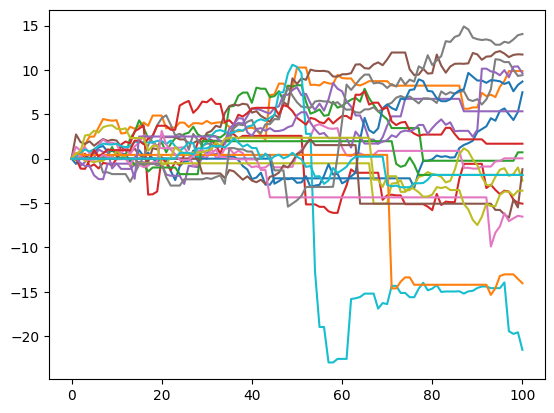

In [439]:
avg_return = compute_avg_return_print(evaluation_env, C51_agent.policy, 20)
print(avg_return)

In [ ]:
snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')

for stat in top_stats[:10]:
    print(stat)